In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [121]:
clinic_df = pd.read_csv("/content/drive/MyDrive/Signal_Data/KINZ/ClinicalData80.csv")
kinz_df = pd.read_csv("/content/drive/MyDrive/Signal_Data/KINZ/kinzData_panda_2024-05-06_12-24PM.csv")

In [122]:
clinic_df

,RecordID,Age,Sex,Ethnicity,Race,ZipCode,SmokingStatus,PackyearSmokingHistory,AlcoholUse,FrequencyInPastWeekOfDrinks,...,Complication3Description,Complication4Type,Complication4ClavienDindoAssessmentGrade,Complication4Description,Complication5Type,Complication5ClavienDindoAssessmentGrade,Complication5Description,ComprehensiveComplicationIndexScore,AdditionalNotes,Complete6
0,001-LO,43,Female,Not Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
1,002-RJ,77,Female,Not Hispanic or Latino,Black or African American,NaN,No,NaN,No,NaN,...,Numbness in fingers,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,Complete
2,003-RM,48,Male,Hispanic or Latino,White,NaN,Past,3,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,Complete
3,004-MF,54,Female,Hispanic or Latino,White,NaN,Past,1,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
4,005-GP,46,Male,Hispanic or Latino,White,NaN,No,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,076-AH,60,Male,Not Hispanic or Latino,Black or African American,11236.0,Past,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
75,077-SK,79,Male,Not Hispanic or Latino,White,12572.0,Past,25.00,Yes,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
76,078-SM,81,Male,Not Hispanic or Latino,White,11516.0,Past,30.00,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
77,079-KO,78,Female,Not Hispanic or Latino,White,11372.0,No,NaN,Yes,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete


In [123]:

clinic_df["OverallFrailtyAssessment"].value_counts()

OverallFrailtyAssessment
Intermediate: 1-2 criteria present    44
Robust: 0 criteria present            24
Frail: ≥3 criteria present            10
Name: count, dtype: int64

In [124]:
clinic_df["OverallFrailtyAssessment"] = clinic_df["OverallFrailtyAssessment"].replace({'Intermediate: 1-2 criteria present': 0,
                                                                                       'Robust: 0 criteria present': 1,
                                                                                       'Frail: ≥3 criteria present': 2})

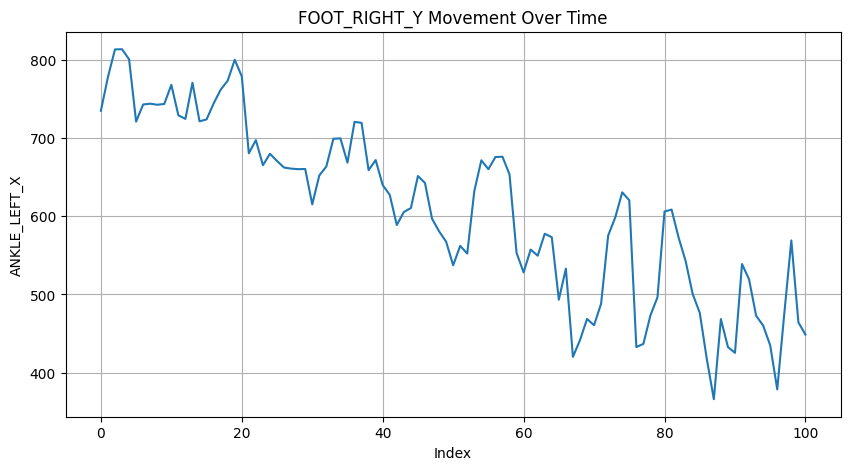

In [125]:
import matplotlib.pyplot as plt

# Select the data
batch_size = 100
column = "FOOT_RIGHT_Y"

data = kinz_df.loc[:batch_size, column]

# Create the line plot
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(data.index, data.values, linestyle='-')  # Plot the data
plt.title(column+' Movement Over Time')  # Add a title
plt.xlabel('Index')  # X-axis label
plt.ylabel('ANKLE_LEFT_X')  # Y-axis label
plt.grid(True)  # Add a grid
plt.show()  # Display the plot


In [126]:
import pandas as pd


columns = kinz_df.columns.tolist()


body_parts = set(part[:-2] for part in columns if part.endswith(('_X', '_Y', '_Z')))
sorted_parts = sorted(body_parts)
new_columns = ['patientID', 'trial_num', 'walking_speed', 'timeStamps']  # Start with these fixed columns
for part in sorted_parts:

    for coord in ['_X', '_Y', '_Z']:
        new_columns.append(part + coord)
kinz_df = kinz_df[new_columns]


In [127]:
kinz_df

,patientID,trial_num,walking_speed,timeStamps,ANKLE_LEFT_X,ANKLE_LEFT_Y,ANKLE_LEFT_Z,ANKLE_RIGHT_X,ANKLE_RIGHT_Y,ANKLE_RIGHT_Z,...,THUMB_LEFT_Z,THUMB_RIGHT_X,THUMB_RIGHT_Y,THUMB_RIGHT_Z,WRIST_LEFT_X,WRIST_LEFT_Y,WRIST_LEFT_Z,WRIST_RIGHT_X,WRIST_RIGHT_Y,WRIST_RIGHT_Z
0,001-LO,1,Regular,0.000000,390.562805,602.859009,1100.335571,463.011200,632.787964,861.115906,...,1145.996216,564.766174,145.974594,1083.058838,413.098236,-4.848353,1048.260864,591.701233,95.389412,988.159851
1,001-LO,1,Regular,0.031953,450.613678,627.286072,1276.520630,482.768677,654.531128,785.082581,...,1157.933228,592.330017,131.384872,1081.694458,424.203186,53.901688,1039.679077,686.942322,95.910889,1071.759644
2,001-LO,1,Regular,0.064029,431.553619,644.666809,1368.638550,522.916382,679.347290,774.065186,...,1171.173462,639.781372,103.950005,1087.459351,422.456421,73.186546,1057.114258,746.073425,74.025307,1121.079712
3,001-LO,1,Regular,0.239935,461.244110,659.211304,1528.767090,644.572632,682.580811,1240.194946,...,1209.790894,718.639771,154.724213,1271.734253,299.355225,68.522301,1184.870972,770.750427,55.768864,1316.004639
4,001-LO,1,Regular,0.271985,462.041687,661.941528,1535.726196,636.041260,666.786926,1293.354126,...,1285.507080,745.663025,155.708374,1342.324951,269.003235,46.742737,1239.554077,784.686951,50.482513,1371.748047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36978,080-TW,4,Fast,6.672006,0.126880,446.535370,1090.030762,-175.127060,434.097626,1092.649170,...,875.477295,-302.459106,-167.914749,858.258667,195.830185,-223.843414,788.262939,-371.584137,-232.415070,762.661682
36979,080-TW,4,Fast,6.704002,0.966503,431.704987,1087.463257,-165.724731,431.496918,1075.524658,...,856.007202,-308.187500,-176.329666,846.691711,194.798309,-232.748657,755.283325,-375.846252,-229.469437,745.169312
36980,080-TW,4,Fast,6.736022,37.078635,385.959290,1084.058466,-113.419082,393.683144,1083.271381,...,828.731496,-307.569259,-176.856063,843.140807,117.694591,-216.364935,737.265767,-350.738825,-215.533525,733.906983
36981,080-TW,4,Fast,6.768004,73.147911,340.267883,1080.657715,-61.175507,355.914246,1091.008911,...,801.488159,-306.951752,-177.381836,839.594116,40.682377,-200.000656,719.269592,-325.661194,-201.614151,722.658020


In [128]:
list(kinz_df.columns)

['patientID',
 'trial_num',
 'walking_speed',
 'timeStamps',
 'ANKLE_LEFT_X',
 'ANKLE_LEFT_Y',
 'ANKLE_LEFT_Z',
 'ANKLE_RIGHT_X',
 'ANKLE_RIGHT_Y',
 'ANKLE_RIGHT_Z',
 'CLAVICLE_LEFT_X',
 'CLAVICLE_LEFT_Y',
 'CLAVICLE_LEFT_Z',
 'CLAVICLE_RIGHT_X',
 'CLAVICLE_RIGHT_Y',
 'CLAVICLE_RIGHT_Z',
 'EAR_LEFT_X',
 'EAR_LEFT_Y',
 'EAR_LEFT_Z',
 'EAR_RIGHT_X',
 'EAR_RIGHT_Y',
 'EAR_RIGHT_Z',
 'ELBOW_LEFT_X',
 'ELBOW_LEFT_Y',
 'ELBOW_LEFT_Z',
 'ELBOW_RIGHT_X',
 'ELBOW_RIGHT_Y',
 'ELBOW_RIGHT_Z',
 'EYE_LEFT_X',
 'EYE_LEFT_Y',
 'EYE_LEFT_Z',
 'EYE_RIGHT_X',
 'EYE_RIGHT_Y',
 'EYE_RIGHT_Z',
 'FOOT_LEFT_X',
 'FOOT_LEFT_Y',
 'FOOT_LEFT_Z',
 'FOOT_RIGHT_X',
 'FOOT_RIGHT_Y',
 'FOOT_RIGHT_Z',
 'HANDTIP_LEFT_X',
 'HANDTIP_LEFT_Y',
 'HANDTIP_LEFT_Z',
 'HANDTIP_RIGHT_X',
 'HANDTIP_RIGHT_Y',
 'HANDTIP_RIGHT_Z',
 'HAND_LEFT_X',
 'HAND_LEFT_Y',
 'HAND_LEFT_Z',
 'HAND_RIGHT_X',
 'HAND_RIGHT_Y',
 'HAND_RIGHT_Z',
 'HEAD_X',
 'HEAD_Y',
 'HEAD_Z',
 'HIP_LEFT_X',
 'HIP_LEFT_Y',
 'HIP_LEFT_Z',
 'HIP_RIGHT_X',
 'HIP_RIGHT

In [129]:
"""feat = ['patientID',
        'trial_num',
        'walking_speed',
        'timeStamps',
        'ANKLE_LEFT_X',
        'ANKLE_LEFT_Y',
        'ANKLE_LEFT_Z',
        'ANKLE_RIGHT_X',
        'ANKLE_RIGHT_Y',
        'ANKLE_RIGHT_Z',
        'FOOT_LEFT_X',
        'FOOT_LEFT_Y',
        'FOOT_LEFT_Z',
        'FOOT_RIGHT_X',
        'FOOT_RIGHT_Y',
        'FOOT_RIGHT_Z',
        'HIP_LEFT_X',
        'HIP_LEFT_Y',
        'HIP_LEFT_Z',
        'HIP_RIGHT_X',
        'HIP_RIGHT_Y',
        'HIP_RIGHT_Z',
        'KNEE_LEFT_X',
        'KNEE_LEFT_Y',
        'KNEE_LEFT_Z',
        'KNEE_RIGHT_X',
        'KNEE_RIGHT_Y',
        'KNEE_RIGHT_Z',

        ]

feat2 = ['patientID',
        'trial_num',
        'walking_speed',
        'timeStamps',
        'ANKLE_LEFT_X',
        'ANKLE_LEFT_Y',
        'ANKLE_LEFT_Z',
        'ANKLE_RIGHT_X',
        'ANKLE_RIGHT_Y',
        'ANKLE_RIGHT_Z',
        'FOOT_LEFT_X',
        'FOOT_LEFT_Y',
        'FOOT_LEFT_Z',
        'FOOT_RIGHT_X',
        'FOOT_RIGHT_Y',
        'FOOT_RIGHT_Z']



kinz_df = kinz_df[feat2]"""

"feat = ['patientID',\n        'trial_num',\n        'walking_speed',\n        'timeStamps',\n        'ANKLE_LEFT_X',\n        'ANKLE_LEFT_Y',\n        'ANKLE_LEFT_Z',\n        'ANKLE_RIGHT_X',\n        'ANKLE_RIGHT_Y',\n        'ANKLE_RIGHT_Z',\n        'FOOT_LEFT_X',\n        'FOOT_LEFT_Y',\n        'FOOT_LEFT_Z',\n        'FOOT_RIGHT_X',\n        'FOOT_RIGHT_Y',\n        'FOOT_RIGHT_Z',\n        'HIP_LEFT_X',\n        'HIP_LEFT_Y',\n        'HIP_LEFT_Z',\n        'HIP_RIGHT_X',\n        'HIP_RIGHT_Y',\n        'HIP_RIGHT_Z',\n        'KNEE_LEFT_X',\n        'KNEE_LEFT_Y',\n        'KNEE_LEFT_Z',\n        'KNEE_RIGHT_X',\n        'KNEE_RIGHT_Y',\n        'KNEE_RIGHT_Z',\n\n        ]\n\nfeat2 = ['patientID',\n        'trial_num',\n        'walking_speed',\n        'timeStamps',\n        'ANKLE_LEFT_X',\n        'ANKLE_LEFT_Y',\n        'ANKLE_LEFT_Z',\n        'ANKLE_RIGHT_X',\n        'ANKLE_RIGHT_Y',\n        'ANKLE_RIGHT_Z',\n        'FOOT_LEFT_X',\n        'FOOT_LEFT_Y',\n        

In [130]:
kinz_df.shape

(36983, 100)

# Concatenation

In [131]:
target = "OverallFrailtyAssessment"

In [132]:
import numpy as np
from tqdm import tqdm


kinz_np = kinz_df.values # converting to np array

new_kinz = []
not_found_sub = []




for i in tqdm(kinz_np):

  # some RecordId name formate is not matching with the main data file....So we have to re formate the name
  sep = i[0].split("-")
  if sep[0].isdigit():
    sub = i[0]
  else:
    sub  = sep[-1]+"-"+sep[0]

  #quearing the TotalFFIScore
  total_ffi_score = clinic_df[clinic_df["RecordID"]==sub][target]

  # Check if total_ffi_score is not empty
  if not total_ffi_score.empty:
    new_row = np.append(i, total_ffi_score.iloc[0])
  else:
    not_found_sub.append(i[0])
    new_row = np.append(i, 'nan')  # Append 'nan' for missing values
    #print("Loop broke!!!")

  new_kinz.append(new_row)




kinz_np = np.array(new_kinz)

100%|██████████| 36983/36983 [00:24<00:00, 1480.66it/s]


In [133]:
set(not_found_sub)

{'015-GE',
 '021-GA',
 '056-STs',
 '064-JH',
 '065-RC',
 '066-SC',
 '076-TH',
 '080-TW',
 'ss'}

In [134]:
"""
sub
clinic_df[clinic_df["RecordID"]=="GE-015"]["TotalFFIScore"]
"""

'\nsub\nclinic_df[clinic_df["RecordID"]=="GE-015"]["TotalFFIScore"]\n'

# Removing NaN

In [135]:

# Create a mask for rows containing NaN values
mask = np.any(kinz_np == 'nan', axis=1)

# Use the mask to select only the rows without NaN values
kinz_np = kinz_np[~mask]

np.where(kinz_np == 'nan')

(array([], dtype=int64), array([], dtype=int64))

In [136]:
kinz_np.shape

(32727, 101)

# Dfined Libraries

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def np_val_count(data,col):
  last_elements = data[:, col]
  value_counts = np.unique(last_elements, return_counts=True)
  for value, count in zip(*value_counts):
      print(f"Value: {value}, Count: {count}")



col_code={
    "Prediction":'#003BCC',
    "Ground Truth":'#CC0900',
    "Nominal Model":'#117A65'
}



def pred_vs_act(pred,act):
  # plot BIS
  plt.figure(figsize=(10, 6))
  plt.plot(pred,label='Prediction',color=col_code['Prediction'])
  plt.plot(act,label='Ground Truth',color=col_code['Ground Truth'])


  plt.xlabel('Time (min)')
  plt.ylabel('BIS')
  plt.title('BIS')
  plt.legend()
  plt.show()




import matplotlib.pyplot as plt
def history_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  # Plot training and validation accuracy
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  # Plot training and validation loss
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()


def np_Query(data,col_index,value):
  condition = data[:, col_index] == value
  indices = np.where(condition)[0]
  return kinz_np[indices]







from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def eval_mat(model):
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)


    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred_classes)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report (Precision, Recall, F1-score)
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred_classes))

    # Calculate Accuracy
    accuracy = accuracy_score(y_val, y_pred_classes)
    print(f"Accuracy: {accuracy*100:.2f}%")


# Selecting `Fast` for walking speed

In [138]:
kinz_np = np_Query(kinz_np,2,'Fast')
kinz_np

array([['001-LO', 3, 'Fast', ..., 120.7342300415039, 1084.9300537109375,
        0.0],
       ['001-LO', 3, 'Fast', ..., -50.20004653930664, 1345.118896484375,
        0.0],
       ['001-LO', 3, 'Fast', ..., -23.14031219482422, 1365.506591796875,
        0.0],
       ...,
       ['079-KO', 4, 'Fast', ..., -183.87863159179688, 862.876953125,
        0.0],
       ['079-KO', 4, 'Fast', ..., -177.07972717285156, 834.868408203125,
        0.0],
       ['079-KO', 4, 'Fast', ..., -165.88893127441406, 776.75, 0.0]],
      dtype=object)

# Spliting Training/Testing Subject wise

In [79]:
"""test_sub = []
train_sub = []
div_per = .7


for i in tqdm([0.0,1.0,2.0,3.0]):

  temp = np_Query(kinz_np,-1,i)

  sub_count = []
  last_elements = temp[:, 0]
  value_counts = np.unique(last_elements, return_counts=True)


  for value, count in zip(*value_counts):
      sub_count.append((value,count))

  total_sum = 0
  for item in sub_count:
      total_sum += item[1]

  percentage = total_sum*div_per

  sorted_data = sorted(sub_count, key=lambda x: x[-1])

  sum = 0
  for i in sorted_data:
    if sum < percentage:
      train_sub.append(i[0])
      sum = sum + i[1]
    else:
      test_sub.append(i[0])
      sum = sum + i[1]

"""

100%|██████████| 4/4 [00:00<00:00, 75.96it/s]


In [139]:
"""train_sub"""

'train_sub'

In [140]:
"""test_sub"""

'test_sub'

In [82]:
#sub_with_4 = ['051-BV', '067-MT']

In [83]:
"""train_sub.append(sub_with_4[0])
test_sub.append(sub_with_4[1])"""

'train_sub.append(sub_with_4[0])\ntest_sub.append(sub_with_4[1])'

In [142]:
"""
matches = np.isin(kinz_np[:, 0], train_sub)
train_data = kinz_np[matches]
train_data.shape"""

'\nmatches = np.isin(kinz_np[:, 0], train_sub)\ntrain_data = kinz_np[matches]\ntrain_data.shape'

In [141]:
"""matches = np.isin(kinz_np[:, 0], test_sub)
test_data = kinz_np[matches]
test_data.shape"""

'matches = np.isin(kinz_np[:, 0], test_sub)\ntest_data = kinz_np[matches]\ntest_data.shape'

# Spliting into Xtrain Xtest and ytrain and ytest

In [144]:
kinz_np

array([['001-LO', 3, 'Fast', ..., 120.7342300415039, 1084.9300537109375,
        0.0],
       ['001-LO', 3, 'Fast', ..., -50.20004653930664, 1345.118896484375,
        0.0],
       ['001-LO', 3, 'Fast', ..., -23.14031219482422, 1365.506591796875,
        0.0],
       ...,
       ['079-KO', 4, 'Fast', ..., -183.87863159179688, 862.876953125,
        0.0],
       ['079-KO', 4, 'Fast', ..., -177.07972717285156, 834.868408203125,
        0.0],
       ['079-KO', 4, 'Fast', ..., -165.88893127441406, 776.75, 0.0]],
      dtype=object)

In [151]:
"""X_train  = train_data[:,4:-1].astype(np.float64)
y_train = train_data[:,-1].astype(np.float64)

X_val  = test_data[:,4:-1].astype(np.float64)
y_val = test_data[:,-1].astype(np.float64)"""

X_train = kinz_np[:,4:-1].astype(np.float64)
y_train = kinz_np[:,-1].astype(np.float64)

In [152]:
X_train.shape

(13419, 96)

# Training Destibution Before Balancing

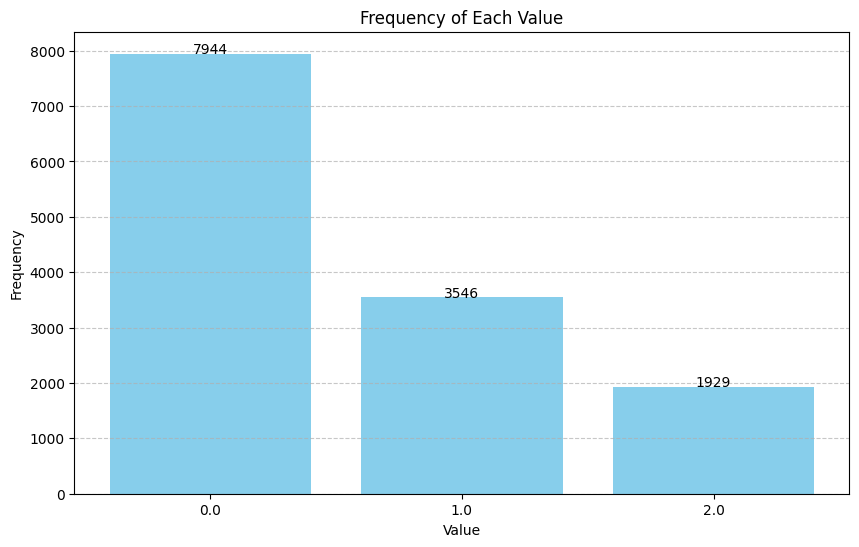

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


series = pd.Series(y_train)

# Get value counts
value_counts = series.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
plt.title('Frequency of Each Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels on the bars
for index, value in enumerate(value_counts.values):
    plt.text(x=index, y=value + 1, s=f"{value}", ha='center')  # Adjust positioning as needed

plt.show()

# Training Destibution After Over Sampling

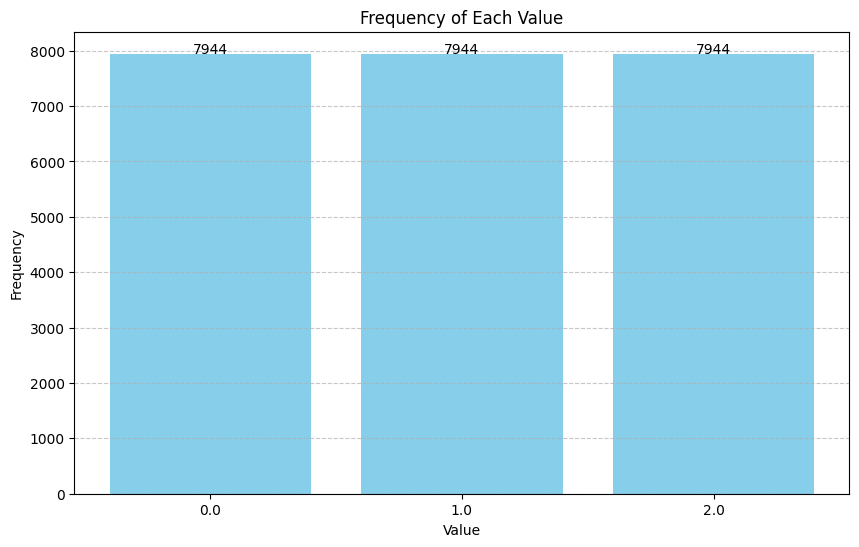

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)






series = pd.Series(y_train)

# Get value counts
value_counts = series.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
plt.title('Frequency of Each Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels on the bars
for index, value in enumerate(value_counts.values):
    plt.text(x=index, y=value + 1, s=f"{value}", ha='center')  # Adjust positioning as needed

plt.show()

# Training Destibution After Under Sampling

In [155]:
"""from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)





import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


series = pd.Series(y_train)

# Get value counts
value_counts = series.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
plt.title('Frequency of Each Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels on the bars
for index, value in enumerate(value_counts.values):
    plt.text(x=index, y=value + 1, s=f"{value}", ha='center')  # Adjust positioning as needed

plt.show()"""

'from imblearn.under_sampling import RandomUnderSampler\n\nrus = RandomUnderSampler(random_state=42)\nX_train, y_train = rus.fit_resample(X_train, y_train)\n\n\n\n\n\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\n\nseries = pd.Series(y_train)\n\n# Get value counts\nvalue_counts = series.value_counts().sort_index()\n\nplt.figure(figsize=(10, 6))\nplt.bar(value_counts.index.astype(str), value_counts.values, color=\'skyblue\')\nplt.title(\'Frequency of Each Value\')\nplt.xlabel(\'Value\')\nplt.ylabel(\'Frequency\')\n#plt.xticks(rotation=45)\nplt.grid(axis=\'y\', linestyle=\'--\', alpha=0.7)\n\n# Adding text labels on the bars\nfor index, value in enumerate(value_counts.values):\n    plt.text(x=index, y=value + 1, s=f"{value}", ha=\'center\')  # Adjust positioning as needed\n\nplt.show()'

# Testing Destribution

In [156]:
"""from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_val, y_val = rus.fit_resample(X_val, y_val)"""

'from imblearn.under_sampling import RandomUnderSampler\n\nrus = RandomUnderSampler(random_state=42)\nX_val, y_val = rus.fit_resample(X_val, y_val)'

In [157]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_val, y_val = smote.fit_resample(X_val, y_val)

ValueError: Found array with dim 3. SMOTE expected <= 2.

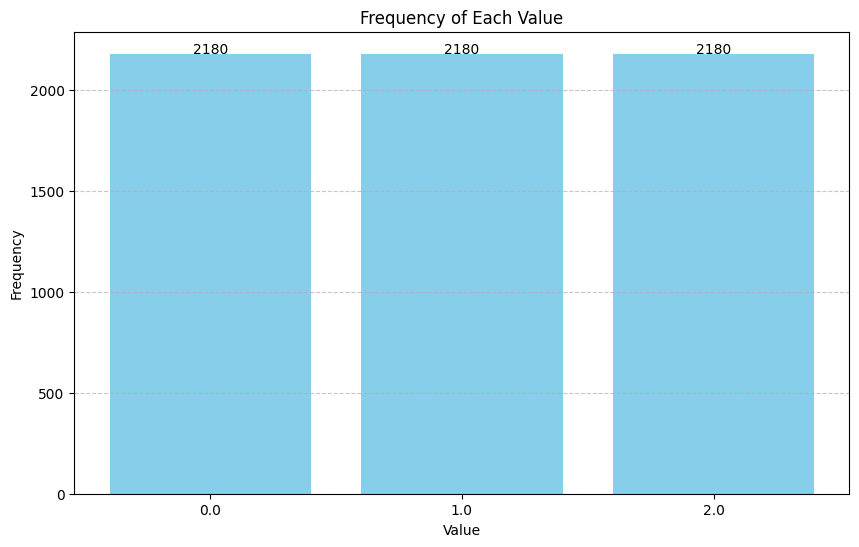

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




series = pd.Series(y_val)

# Get value counts
value_counts = series.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
plt.title('Frequency of Each Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels on the bars
for index, value in enumerate(value_counts.values):
    plt.text(x=index, y=value + 1, s=f"{value}", ha='center')  # Adjust positioning as needed

plt.show()

# Converting axis - x,y,z into single feature

In [159]:
X_train = X_train.reshape(X_train.shape[0], -1, 3)

X_val   = X_val.reshape(X_val.shape[0], -1, 3)

In [160]:
X_train

array([[[ 5.15741150e+02,  6.71594055e+02,  1.21377734e+03],
        [ 6.45061523e+02,  7.12031677e+02,  1.10094702e+03],
        [ 5.96188843e+02, -3.08304352e+02,  1.00194812e+03],
        ...,
        [ 6.15062988e+02,  1.62476364e+02,  1.19297913e+03],
        [ 6.32725281e+02,  2.82278657e+00,  1.26488464e+03],
        [ 6.34338257e+02,  1.20734230e+02,  1.08493005e+03]],

       [[ 5.42489319e+02,  6.19746582e+02,  1.38628723e+03],
        [ 5.85249268e+02,  6.73441284e+02,  1.01776611e+03],
        [ 6.21472839e+02, -3.68965454e+02,  1.05086853e+03],
        ...,
        [ 8.12382446e+02, -4.22739563e+01,  1.45821619e+03],
        [ 4.40435638e+02, -2.65324554e+01,  1.23060217e+03],
        [ 8.50070007e+02, -5.02000465e+01,  1.34511890e+03]],

       [[ 5.61224976e+02,  6.23132446e+02,  1.45773047e+03],
        [ 6.13983643e+02,  6.62509094e+02,  9.71040222e+02],
        [ 6.15779297e+02, -3.81209076e+02,  1.10968042e+03],
        ...,
        [ 8.10874573e+02, -4.34589882e+01,

In [96]:
y_train

array([0., 0., 0., ..., 2., 2., 2.])

In [97]:
len(y_train)

17292

In [98]:
set(y_train)

{0.0, 1.0, 2.0}

In [99]:
set(y_val)

{0.0, 1.0, 2.0}

In [100]:
n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]

In [101]:
X_train.shape,X_val.shape

((17292, 32, 3), (6540, 32, 3))

In [102]:
X_train

array([[[  320.70584106,   488.94055176,   800.23675537],
        [  514.17102051,   490.07736206,   851.42047119],
        [  357.83676147,  -553.36584473,   774.64373779],
        ...,
        [  517.61096191,   -46.2372818 ,   994.94903564],
        [  161.2000885 ,  -198.94985962,  1036.38439941],
        [  503.25863647,  -102.71130371,   885.77111816]],

       [[  317.12884521,   465.39801025,  1101.10620117],
        [  419.74691772,   433.29919434,  1195.9855957 ],
        [  352.55053711,  -552.43920898,   830.51208496],
        ...,
        [  521.93902588,   -24.88249969,  1023.68023682],
        [  166.31105042,  -207.97380066,  1101.32592773],
        [  527.53814697,   -94.01373291,   923.53790283]],

       [[  302.23245239,   511.59686279,   968.7142334 ],
        [  501.57421875,   491.67190552,  1057.68054199],
        [  359.15994263,  -572.58392334,   879.37103271],
        ...,
        [  618.85491943,   -47.13815308,   988.03753662],
        [  155.70539856,  -21

In [103]:
y_train

array([0., 0., 0., ..., 2., 2., 2.])

#Models

For classifying signal data from a 3-axis sensor (like accelerometers or gyroscopes), advanced deep learning models are often utilized for their ability to learn complex patterns and features directly from the data. Below are some state-of-the-art models and techniques that are particularly effective for this type of task:

1. **Convolutional Neural Networks (CNNs):**
   - **1D CNNs**: These are highly effective for time-series signal data because they can capture local dependencies and scale invariance in the data. By applying convolution operations along the time dimension, 1D CNNs can extract features from the x, y, and z channels efficiently.
   - **Multi-channel CNNs**: This approach uses separate convolutional branches for each axis of the sensor data, allowing the network to learn axis-specific features before merging the outputs for classification.

2. **Recurrent Neural Networks (RNNs):**
   - **Long Short-Term Memory (LSTM)**: LSTMs are great for time-series data as they can capture long-term dependencies in the data sequence, which is crucial for understanding the context in signal patterns.
   - **Gated Recurrent Units (GRU)**: GRUs are similar to LSTMs but with fewer parameters, making them simpler and faster to train while still capturing temporal dependencies effectively.

3. **Hybrid Models:**
   - **CNN-LSTM**: Combining CNNs with LSTMs leverages the strengths of both architectures—spatial feature extraction by CNNs and temporal dependency modeling by LSTMs. This combination is powerful for complex time-series classification tasks.
   - **Attention-based CNN-RNN**: Integrating attention mechanisms with CNN-RNN structures can help the model focus on the most relevant features of the signal data, improving classification accuracy.

4. **Transformers for Time Series:**
   - Transformers, originally designed for natural language processing, have been adapted for time-series data. They use self-attention mechanisms to weigh the importance of different parts of the signal, making them highly effective for complex patterns that depend on long-range interactions.
   - **Time2Vec + Transformers**: Time2Vec is a technique to encode time series into a vector representation, which can be fed into a transformer model for classification.

5. **Autoencoders:**
   - **Variational Autoencoders (VAE)**: These can be used for feature extraction in an unsupervised manner. The encoded features are then used for classification, typically via a separate classifier like a neural network or SVM.

6. **Temporal Convolutional Networks (TCNs):**
   - TCNs offer an alternative to RNNs with convolutional structures that are specifically adapted to handle sequence data. They have been shown to outperform RNNs in some benchmarks with their ability to handle larger receptive fields and easier training dynamics.

7. **Graph Neural Networks (GNNs):**
   - For sensor data that has an inherent spatial structure (e.g., sensors located in different but related parts of an object or body), GNNs can be used to exploit the relational information among the sensors for more accurate classification.

Each of these models can be tuned and adapted based on the specific characteristics of your data and the complexity of the classification task. It's also important to preprocess your data correctly, normalizing the input signals and possibly augmenting your dataset to improve model robustness. When implementing these models, leveraging libraries like TensorFlow or PyTorch can facilitate experimentation with different architectures and hyperparameters.

In [104]:
EPOCH,BATCH = 200,10

## 1. 1D Convolutional Neural Network (CNN)

In [105]:
X_train.shape

(17292, 32, 3)

In [161]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])



model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])





early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

history = model_cnn.fit(X_train, y_train, epochs=EPOCH,batch_size=BATCH, validation_split=0.2, callbacks=[early_stop])



Epoch 1/200
1907/1907 [==============================] - 14s 7ms/step - loss: 5.6267 - accuracy: 0.4940 - val_loss: 1.5030 - val_accuracy: 0.1143
Epoch 2/200
1907/1907 [==============================] - 14s 7ms/step - loss: 0.9356 - accuracy: 0.4978 - val_loss: 1.5654 - val_accuracy: 0.1108
Epoch 3/200
1907/1907 [==============================] - 12s 7ms/step - loss: 0.9861 - accuracy: 0.4597 - val_loss: 1.8560 - val_accuracy: 0.0000e+00
Epoch 4/200
1907/1907 [==============================] - 11s 6ms/step - loss: 1.0294 - accuracy: 0.4292 - val_loss: 1.7935 - val_accuracy: 0.0000e+00
Epoch 4: early stopping


In [107]:
eval_mat(model_cnn)

205/205 [==============================] - 1s 3ms/step
Confusion Matrix:
[[1305  838   37]
 [1734  446    0]
 [2120   59    1]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.25      0.60      0.36      2180
         1.0       0.33      0.20      0.25      2180
         2.0       0.03      0.00      0.00      2180

    accuracy                           0.27      6540
   macro avg       0.20      0.27      0.20      6540
weighted avg       0.20      0.27      0.20      6540

Accuracy: 26.79%


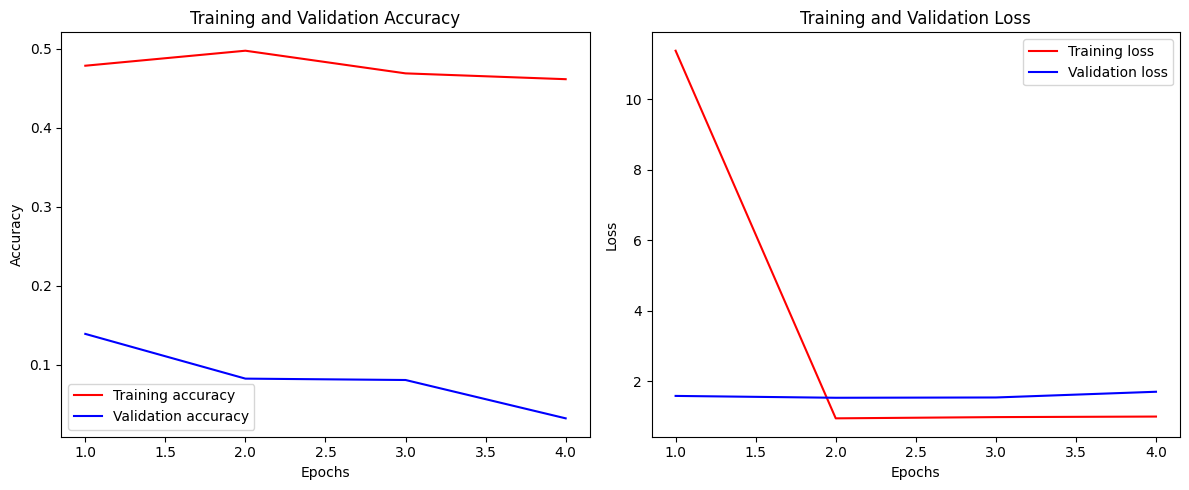

In [108]:
history_plot(history)

## 2. Long Short-Term Memory (LSTM)

In [109]:
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(50, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

history = model_lstm.fit(X_train, y_train, epochs=EPOCH,batch_size=BATCH, validation_split=0.2, callbacks=[early_stop])


Epoch 1/200
1384/1384 [==============================] - 53s 35ms/step - loss: 0.9390 - accuracy: 0.5302 - val_loss: 1.2335 - val_accuracy: 0.2859
Epoch 2/200
1384/1384 [==============================] - 44s 32ms/step - loss: 0.8439 - accuracy: 0.5843 - val_loss: 1.2235 - val_accuracy: 0.4391
Epoch 3/200
1384/1384 [==============================] - 44s 32ms/step - loss: 0.7705 - accuracy: 0.6257 - val_loss: 1.4868 - val_accuracy: 0.3232
Epoch 4/200
1384/1384 [==============================] - 47s 34ms/step - loss: 0.7407 - accuracy: 0.6380 - val_loss: 1.0394 - val_accuracy: 0.4923
Epoch 5/200
1384/1384 [==============================] - 44s 32ms/step - loss: 0.7125 - accuracy: 0.6599 - val_loss: 0.9910 - val_accuracy: 0.5299
Epoch 6/200
1384/1384 [==============================] - 47s 34ms/step - loss: 0.6846 - accuracy: 0.6768 - val_loss: 1.0968 - val_accuracy: 0.4689
Epoch 7/200
1384/1384 [==============================] - 47s 34ms/step - loss: 0.6268 - accuracy: 0.7083 - val_loss: 0

In [110]:
eval_mat(model_lstm)

205/205 [==============================] - 3s 11ms/step
Confusion Matrix:
[[1001  970  209]
 [1057  825  298]
 [1172 1008    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.31      0.46      0.37      2180
         1.0       0.29      0.38      0.33      2180
         2.0       0.00      0.00      0.00      2180

    accuracy                           0.28      6540
   macro avg       0.20      0.28      0.23      6540
weighted avg       0.20      0.28      0.23      6540

Accuracy: 27.92%


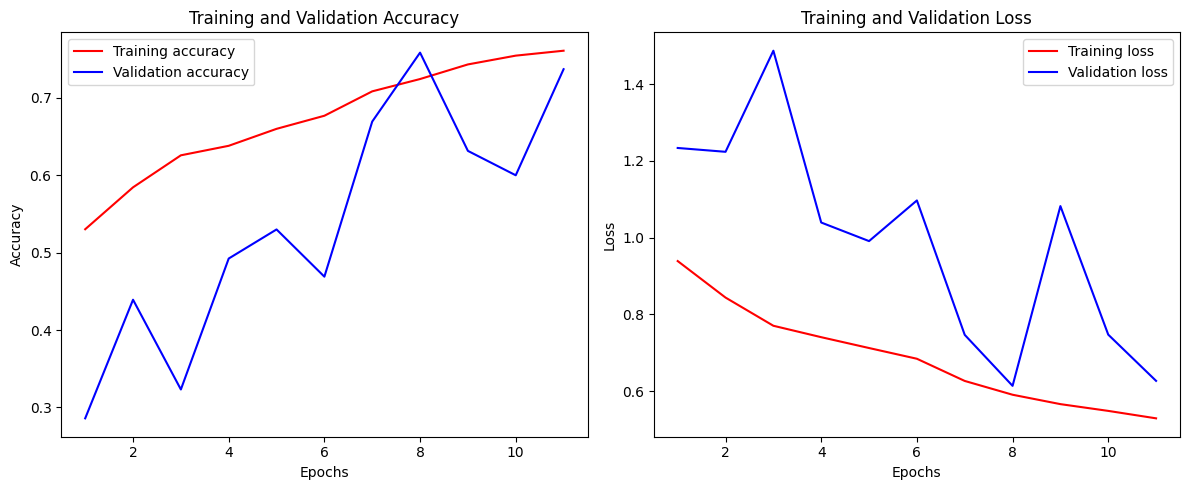

In [111]:
history_plot(history)

## 3. CNN-LSTM Hybrid Model

In [112]:
from tensorflow.keras.layers import TimeDistributed

model_cnn_lstm = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    LSTM(50),
    Dense(50, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model_cnn_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



#early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

history = model_cnn.fit(X_train, y_train, epochs=EPOCH,batch_size=BATCH,validation_split=0.2, callbacks=[early_stop])


Epoch 1/200
1384/1384 [==============================] - 10s 7ms/step - loss: 1.0443 - accuracy: 0.4270 - val_loss: 1.8318 - val_accuracy: 0.0147
Epoch 2/200
1384/1384 [==============================] - 8s 6ms/step - loss: 1.0254 - accuracy: 0.4207 - val_loss: 1.7304 - val_accuracy: 0.0000e+00
Epoch 3/200
1384/1384 [==============================] - 10s 7ms/step - loss: 1.0542 - accuracy: 0.4134 - val_loss: 1.7457 - val_accuracy: 0.0000e+00
Epoch 4/200
1384/1384 [==============================] - 9s 6ms/step - loss: 1.0286 - accuracy: 0.4145 - val_loss: 1.7567 - val_accuracy: 0.0000e+00
Epoch 4: early stopping


In [113]:
eval_mat(model_cnn)

205/205 [==============================] - 1s 3ms/step
Confusion Matrix:
[[  44 2133    3]
 [   6 2174    0]
 [  20 2070   90]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.02      0.04      2180
         1.0       0.34      1.00      0.51      2180
         2.0       0.97      0.04      0.08      2180

    accuracy                           0.35      6540
   macro avg       0.65      0.35      0.21      6540
weighted avg       0.65      0.35      0.21      6540

Accuracy: 35.29%


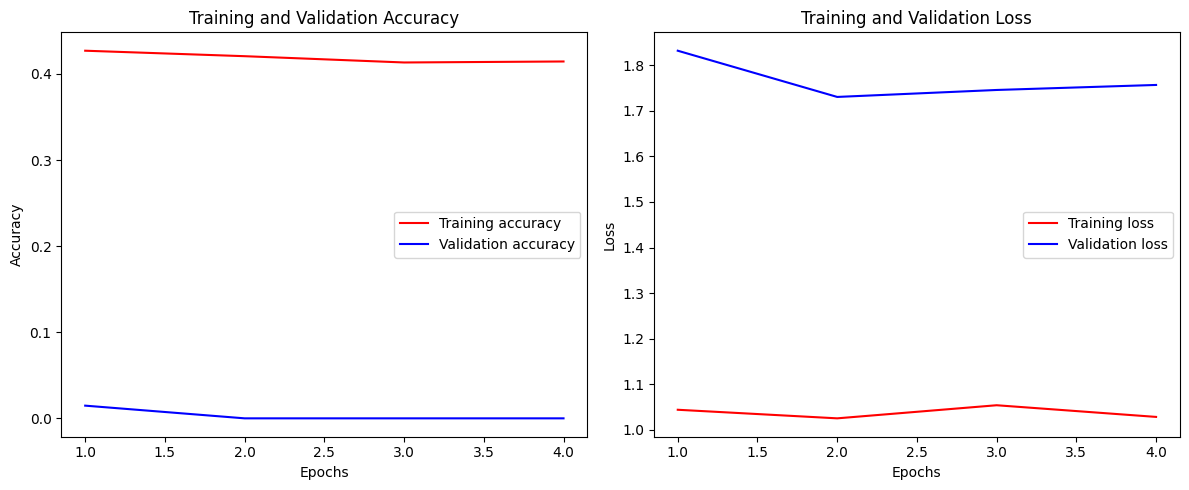

In [114]:
history_plot(history)

## 4. Transformer for Time Series

In [115]:
!pip install keras-nlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Suc

In [116]:
from tensorflow.keras.layers import Input, Dense
from keras_nlp.layers import TransformerEncoder


input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
transformer_layer = TransformerEncoder(num_heads=2, intermediate_dim=128)(input_layer)
x = Flatten()(transformer_layer)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)


model_transformer = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_transformer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



#early_stop = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

history = model_cnn.fit(X_train, y_train, epochs=EPOCH,batch_size=BATCH , validation_split=0.2, callbacks=[early_stop])


Using TensorFlow backend
Epoch 1/200
1384/1384 [==============================] - 8s 6ms/step - loss: 1.0289 - accuracy: 0.4180 - val_loss: 1.8150 - val_accuracy: 0.0000e+00
Epoch 2/200
1384/1384 [==============================] - 9s 7ms/step - loss: 1.0289 - accuracy: 0.4137 - val_loss: 1.7963 - val_accuracy: 0.0000e+00
Epoch 3/200
1384/1384 [==============================] - 9s 7ms/step - loss: 1.0290 - accuracy: 0.4070 - val_loss: 1.7699 - val_accuracy: 0.0000e+00
Epoch 4/200
1384/1384 [==============================] - 10s 8ms/step - loss: 1.0289 - accuracy: 0.4137 - val_loss: 1.7978 - val_accuracy: 0.0000e+00
Epoch 4: early stopping


In [117]:
eval_mat(model_cnn)

205/205 [==============================] - 1s 6ms/step
Confusion Matrix:
[[2162   18    0]
 [2180    0    0]
 [2180    0    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      0.99      0.50      2180
         1.0       0.00      0.00      0.00      2180
         2.0       0.00      0.00      0.00      2180

    accuracy                           0.33      6540
   macro avg       0.11      0.33      0.17      6540
weighted avg       0.11      0.33      0.17      6540

Accuracy: 33.06%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


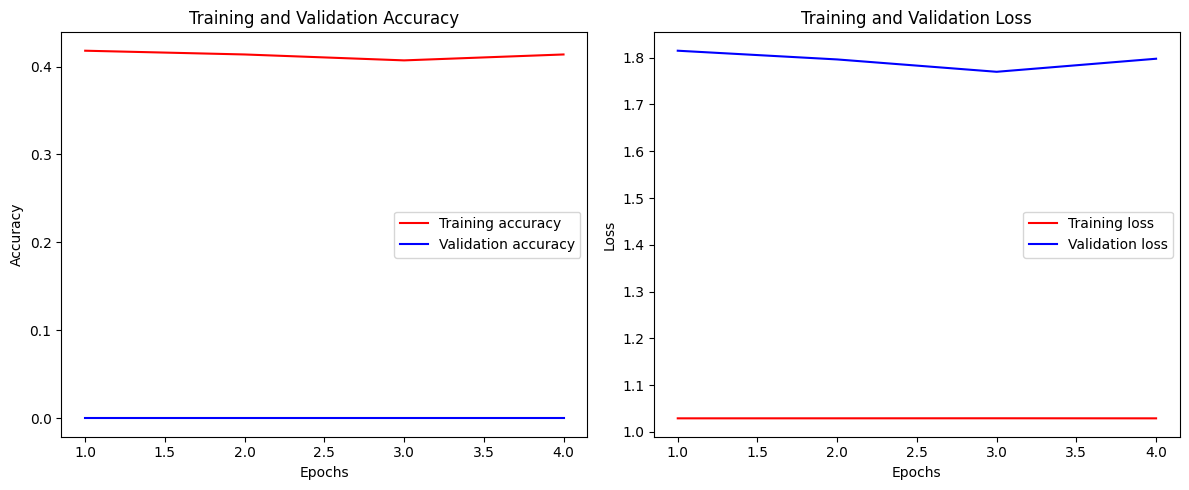

In [118]:
history_plot(history)

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def build_classification_model(input_shape, num_classes):
    # Input Layer
    input_layer = Input(shape=input_shape)

    # Encoder (used here as feature extractor)
    x = Conv1D(16, 3, activation='relu', padding='same')(input_layer)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(8, 3, activation='relu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(8, 3, activation='relu', padding='same')(x)
    x = MaxPooling1D(2, padding='same')(x)  # encoded representation

    # Flatten the feature map
    x = Flatten()(x)

    # Dense Layers for classification
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)  # Dropout layer to reduce overfitting
    output_layer = Dense(num_classes, activation='softmax')(x)  # Output layer for classification

    # Create Model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage
num_classes = 3  # Set the number of classes
model = build_classification_model(input_shape=(X_train.shape[1], X_train.shape[2]), num_classes=num_classes)






history = model.fit(X_train, X_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/accuracy_metrics.py", line 426, in categorical_accuracy
        
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 961, in sparse_categorical_matches
        

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 32 for '{{node Squeeze}} = Squeeze[T=DT_INT64, squeeze_dims=[-1]](ArgMax)' with input shapes: [?,32].
